<a href="https://colab.research.google.com/github/AnIsAsPe/Prediccion_de_Riesgo_python/blob/main/notebooks/Predicci%C3%B3n_de_riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar bibliotecas

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.9MB/s 
     |████████████████████████████████| 9.5MB 11.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
!pip install arch

     |████████████████████████████████| 808kB 7.8MB/s 


In [1]:
import numpy as np
import pandas as pd
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 

from pmdarima.arima import auto_arima
import arch

import matplotlib.pyplot as plt

## [Timestamp en Pandas](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Timestamp.html)

In [2]:
t = pd.Timestamp.now()
t

Timestamp('2021-07-02 23:33:39.758707')

In [3]:
t.date()

datetime.date(2021, 7, 2)

In [4]:
t.time()

datetime.time(23, 33, 39, 758707)

In [5]:
print('Dia: ', t.day)
print('Mes: ', t.month)
print('Año: ', t.year)
print('Hora: ', t.hour)
print('Minutos: ', t.minute)
print('Segundos: ', t.second)

print('Trimestre: ', t.quarter)
print('Semana: ', t.week)
print('Día de la semana: ', t.weekday(), t.day_name())

Dia:  2
Mes:  7
Año:  2021
Hora:  23
Minutos:  33
Segundos:  39
Trimestre:  3
Semana:  26
Día de la semana:  4 Friday


In [6]:
print(t.is_month_start)
print(t.is_month_end)

False
False


## [Timedelta en Pandas](https://)

In [7]:
t2 = pd.Timestamp.now()
d = t2 - t
type(d)

pandas._libs.tslibs.timedeltas.Timedelta

In [8]:
d.seconds

1

In [9]:
d.days

0

# Leer datos

In [10]:
datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Predicci-n-del-riesgo/main/Datos/MSFT%202016-2021.csv',  
                   usecols=['Date','Close'], index_col='Date', parse_dates=['Date'])
datos.columns =['Precio']
datos

,Precio
Date,
2016-01-25,51.790001
2016-01-26,52.169998
2016-01-27,51.220001
2016-01-28,52.060001
2016-01-29,55.090000
...,...
2021-01-15,212.649994
2021-01-19,216.440002
2021-01-20,224.339996


In [11]:
#¿Las fechas están ordenadas?
print(datos.index.min() == datos.index[0] and datos.index.max() == datos.index[-1]) 

True


In [12]:
type(datos.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
datos.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='Date', length=1259)

In [14]:
#años
((datos.index.max()-datos.index.min()).days)/365

4.997260273972603

# Exploración y transformación de la serie de precios

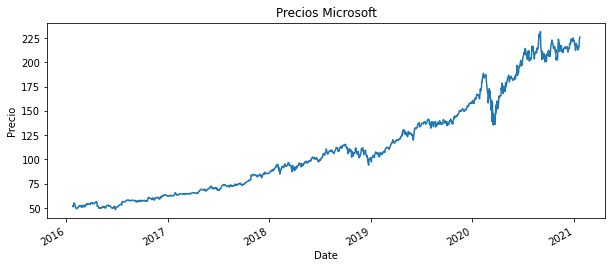

In [15]:
datos['Precio'].plot(figsize=(10,4), title='Precios Microsoft', ylabel = 'Precio',)
plt.show()

¿La serie es estacionaria?
Podemos aplicar ademas la prueba Dickey-Fuller que tiene como Hipótesis nula que la serie NO es estacionaria.

p-value: ¿con qué grado de certeza podemos rechazar la hipotesis nula? 

In [16]:
# ¿La serie es estacionaria?
p_value = adfuller(datos['Precio'])[1]
p_value

0.9953829523104294

Observamos que **la serie no es estacionaria** (su *media* y *varianza* cambian con el tiempo).

Tambien observamos que la serie tiene una **tendencia exponencial**, por lo que para obtener una tendencia lineal, realizaremos una transformación logarítmica, para después calcular los retornos.


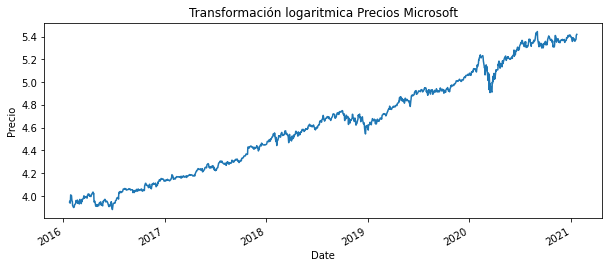

In [17]:
datos['precio_log'] = np.log(datos['Precio'])
datos['precio_log'].plot(figsize=(10,4), title='Transformación logaritmica Precios Microsoft', ylabel = 'Precio',)
plt.show()

In [18]:
datos['retornos_log']= datos['precio_log'].diff()  # en la diferencia perdemos el primer registro
datos.head()

,Precio,precio_log,retornos_log
Date,,,
2016-01-25,51.790001,3.947197,NaN
2016-01-26,52.169998,3.954508,0.007310
2016-01-27,51.220001,3.936130,-0.018377
2016-01-28,52.060001,3.952397,0.016267
2016-01-29,55.090000,4.008968,0.056571


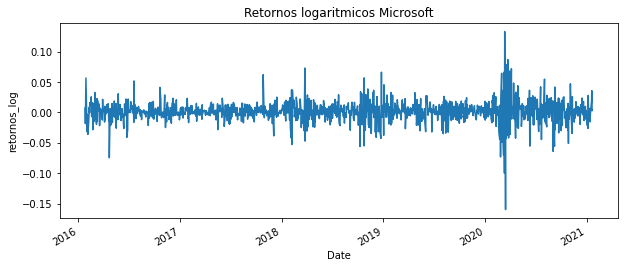

In [19]:

datos['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Microsoft', ylabel = 'retornos_log')
plt.show()

**Observar las diferencias entre precios_log y retornos_log**

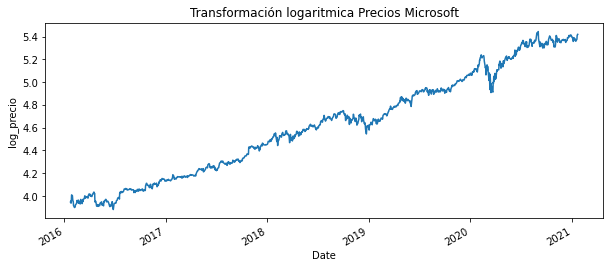

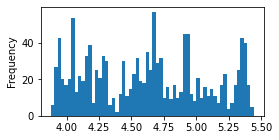

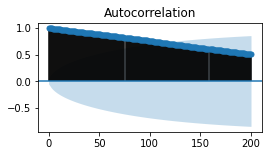

In [20]:
datos['precio_log'] = np.log(datos['Precio'])
datos['precio_log'].plot(figsize=(10,4), title='Transformación logaritmica Precios Microsoft', ylabel = 'log_precio',)
plt.show()

plt.rc("figure", figsize=(4,2))
datos['precio_log'].plot.hist(bins=60)
plt.show()

plot_acf(datos['precio_log'], lags=200)
plt.show()

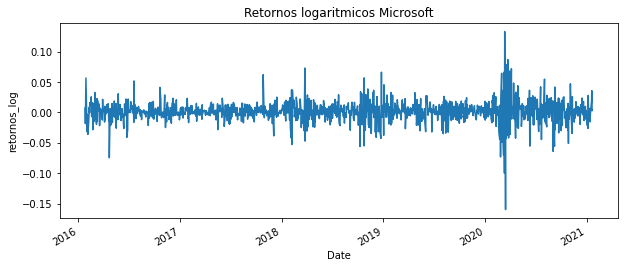

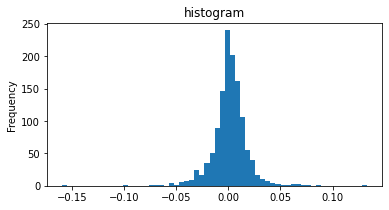

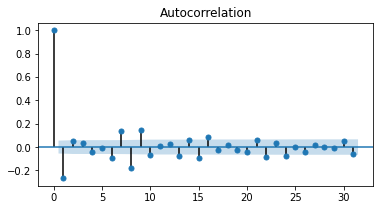

In [21]:

datos['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Microsoft', ylabel = 'retornos_log',)
plt.show()

plt.rc("figure", figsize=(6,3))
datos['retornos_log'][1:].plot.hist(bins=60, title='histogram')
plt.show()

plot_acf(datos['retornos_log'][1:])
plt.show()


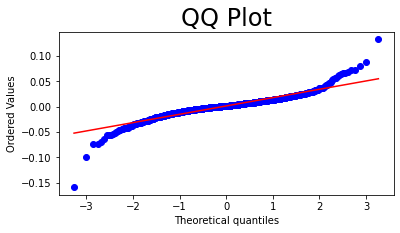

In [22]:
import scipy.stats

scipy.stats.probplot(datos['retornos_log'][1:], plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [23]:
# ¿La serie retornos log es estacionaria?
p_value = adfuller(datos['retornos_log'][1:])[1]
p_value

1.1570346470020825e-23

con el resultado anterior, se rechaza la hipotesis nula, siendo la hipotesis alternativa que la serie es estacionaria, por lo que podemos modelarla mediante modelos autregresivos(AR) y de medias moviles(MA) 

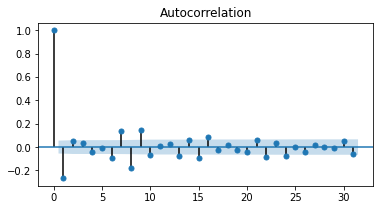

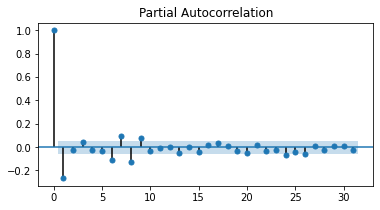

In [24]:
plt.rc("figure", figsize=(6,3))

plot_acf(datos['retornos_log'][1:])
plt.show()

plot_pacf(datos['retornos_log'][1:])
plt.show()

Existen retrasos significativos en los primeros 9 retrasos

# Modelo ARIMA

In [25]:
model_arma = auto_arima( datos['retornos_log'][1:], 
                        stationary= True,  stepwise=False, maxiter=200, trace=True, 
                        information_criterion='aic',max_order=5)
model_arma.summary()

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-6611.650, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-6699.560, Time=0.47 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-6702.925, Time=1.28 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-6701.139, Time=1.61 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-6706.178, Time=1.90 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-6705.300, Time=2.11 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-6703.234, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-6701.804, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-6700.870, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-6699.494, Time=2.79 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-6712.645, Time=3.75 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-6702.025, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-6699.695, Time=1.26 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-6700.567, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-6697.265, Time=1.56

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(3, 0, 2)   Log Likelihood                3365.433
Date:                Fri, 02 Jul 2021   AIC                          -6716.867
Time:                        23:34:15   BIC                          -6680.906
Sample:                             0   HQIC                         -6703.352
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.005      0.181      0.857      -0.009       0.010
ar.L1         -0.4841      1.639     -0.295      0.768      -3.696       2.728
ar.L2          0.5361      1.944      0.276      0.783      -3.274       4.346
ar.L3          0.2041      0.491      0.416      0.678      -0.758       1.167
ma.L1          0.2163      1.635      0.132      0.895      -2.988       3.420
ma.L2         -0.6492      1.495     -0.434      0.664      -3.579       2.281
sigma2         0.0003   6.38e-06     43.563      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              2361.07
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model_arima = auto_arima(datos['precio_log'],
                        stationary= False,  stepwise=False, maxiter=200, trace=False, 
                        information_criterion='aic',max_order=5)
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(3, 1, 2)   Log Likelihood                3365.436
Date:                Fri, 02 Jul 2021   AIC                          -6716.872
Time:                        23:48:40   BIC                          -6680.911
Sample:                             0   HQIC                         -6703.357
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.005      0.189      0.850      -0.008       0.010
ar.L1         -0.4818      1.557     -0.309      0.757      -3.534       2.570
ar.L2          0.5379      1.846      0.291      0.771      -3.081       4.156
ar.L3          0.2045      0.467      0.438      0.661      -0.710       1.119
ma.L1          0.2142      1.553      0.138      0.890      -2.830       3.258
ma.L2         -0.6509      1.420     -0.458      0.647      -3.433       2.131
sigma2         0.0003   6.37e-06     43.572      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              2362.26
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Exploración de residuos del modelo ARMA de Retornos

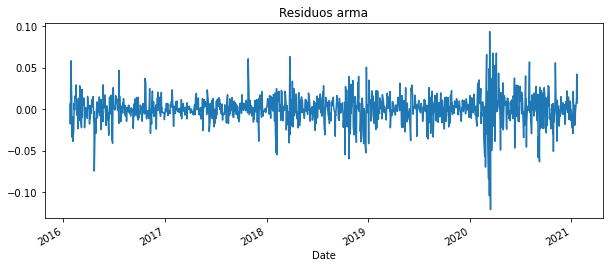

In [27]:
residuos_arma = pd.Series(model_arma.resid(), index = datos.index[1:])
residuos_arma.plot(figsize=(10,4), title='Residuos arma')
plt.show()

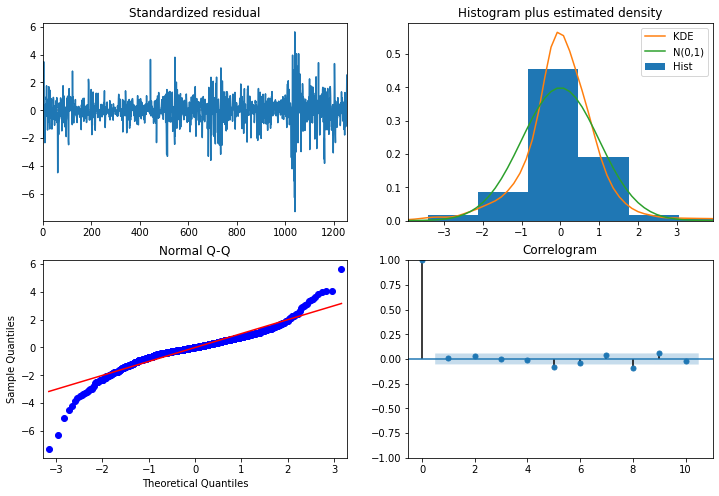

In [28]:

model_arma.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

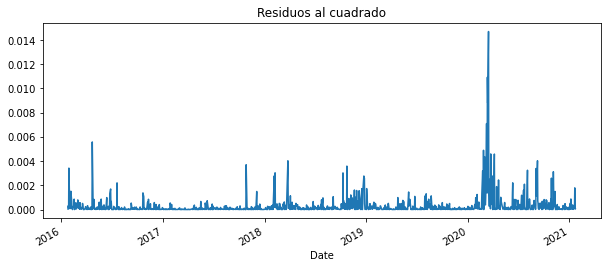

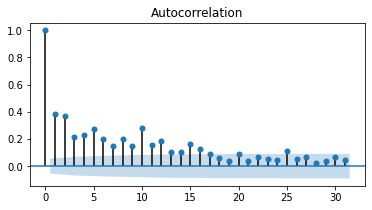

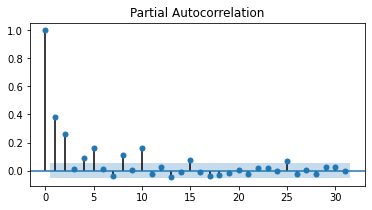

In [29]:
res2 = pow(residuos_arma,2)

res2.plot(figsize=(10,4), title='Residuos al cuadrado')

plot_acf(res2)
plt.show()

plot_pacf(res2)
plt.show()

# GARCH

In [31]:
garch = arch.arch_model(residuos_arma, p=1, q=1, rescale=False )
model_garch= garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3550.4548253924395
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3550.903834582282
Iteration:      3,   Func. Count:     31,   Neg. LLF: -3550.9835616016912
Iteration:      4,   Func. Count:     41,   Neg. LLF: -3551.033631132791
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3551.0336313089792
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4


In [32]:
model_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3551.03
Distribution:                  Normal   AIC:                          -7094.07
Method:            Maximum Likelihood   BIC:                          -7073.52
                                        No. Observations:                 1258
Date:                Fri, Jul 02 2021   Df Residuals:                     1257
Time:                        23:34:48   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.0830e-04  3.567e-04      1.145      0.252 [-2.908e-04,1.107e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7789e-05  1.581e-06     17.582  3.412e-69 [2.469e-05,3.089e-05]
alpha[1]       0.2000  3.860e-02      5.180  2.218e-07     [  0.124,  0.276]
beta[1]        0.6999  3.056e-02     22.906 4.045e-116     [  0.640,  0.760]
============================================================================

Covariance estimator: robust
"""

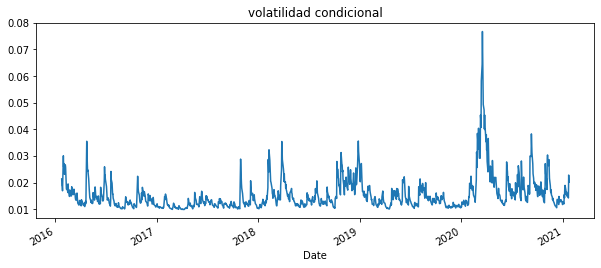

In [33]:
datos['volatilidad_condicional']=np.nan
datos['volatilidad_condicional'][1:]=model_garch.conditional_volatility
datos['volatilidad_condicional'].plot(figsize=(10,4), title='volatilidad condicional')

# Value at Risk

In [35]:
# Riesgo del 5% suponiendo una distribución normal 

In [36]:
lim = datos['retornos_log'].quantile(0.05)
lim

-0.02623832843687395

In [37]:
datos['riesgo_5pc_cte'] = np.nan
datos['riesgo_5pc_cte'][1:]=lim

In [38]:
datos.head()

,Precio,precio_log,retornos_log,volatilidad_condicional,riesgo_5pc_cte
Date,,,,,
2016-01-25,51.790001,3.947197,NaN,NaN,NaN
2016-01-26,52.169998,3.954508,0.007310,0.021375,-0.026238
2016-01-27,51.220001,3.936130,-0.018377,0.018819,-0.026238
2016-01-28,52.060001,3.952397,0.016267,0.018511,-0.026238
2016-01-29,55.090000,4.008968,0.056571,0.016902,-0.026238


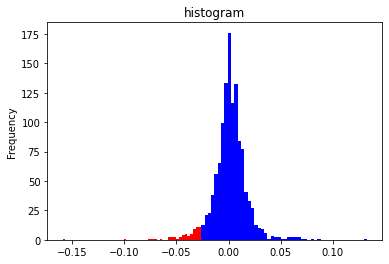

In [39]:
plt.rc("figure", figsize=(6,4))

datos['retornos_log'][lambda x:x>=lim].plot.hist(bins=50, title='histogram', color='blue')
datos['retornos_log'][lambda x:x<lim].plot.hist(bins=50, title='histogram', color='r')
plt.show()

In [40]:
from scipy.stats import norm
lim2 = norm(loc = 0 , scale = 1).ppf(0.05)
lim2

-1.6448536269514729

In [41]:
datos

,Precio,precio_log,retornos_log,volatilidad_condicional,riesgo_5pc_cte
Date,,,,,
2016-01-25,51.790001,3.947197,NaN,NaN,NaN
2016-01-26,52.169998,3.954508,0.007310,0.021375,-0.026238
2016-01-27,51.220001,3.936130,-0.018377,0.018819,-0.026238
2016-01-28,52.060001,3.952397,0.016267,0.018511,-0.026238
2016-01-29,55.090000,4.008968,0.056571,0.016902,-0.026238
...,...,...,...,...,...
2021-01-15,212.649994,5.359648,-0.001738,0.015971,-0.026238
2021-01-19,216.440002,5.377313,0.017666,0.014513,-0.026238
2021-01-20,224.339996,5.413163,0.035849,0.014192,-0.026238


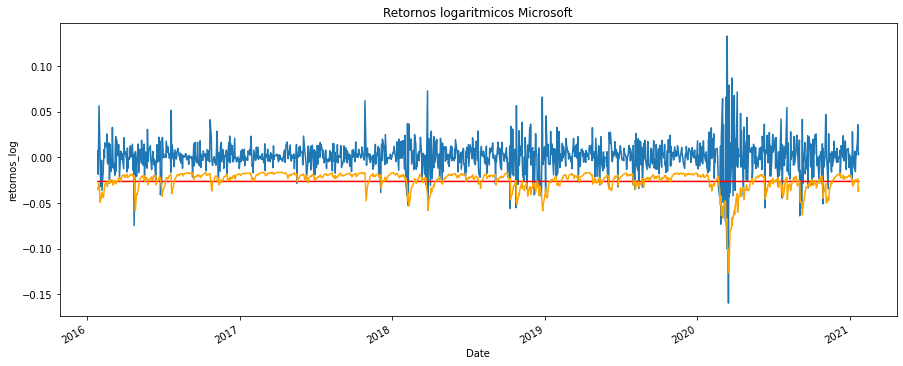

In [42]:
datos['retornos_log'][1:].plot(figsize=(15,6), title='Retornos logaritmicos Microsoft', ylabel = 'retornos_log')
datos['riesgo_5pc_cte'][1:].plot(c='r')
(datos['volatilidad_condicional'][1:]*lim2).plot(c='orange')

plt.show()



# 

# Predicción con ARIMA

Text(0.5, 1.0, 'Predicción del precio con ARIMA')

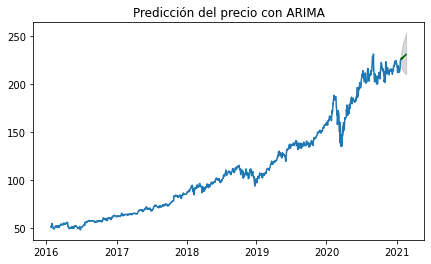

In [65]:
n_periods = 20
fc_log, confint_log = model_arima.predict(n_periods=n_periods,  return_conf_int=True, alpha=0.1 )
fc, confint = np.exp(fc_log), np.exp(confint_log)

# Vamos a crear una serie para graficar más facilmente
ix_fc = pd.date_range( start='23/1/2021', periods=n_periods, freq='B')
fc_series = pd.Series(fc, ix_fc )

lower_series = pd.Series(confint[:, 0],  index=ix_fc )
upper_series = pd.Series(confint[:, 1],  index=ix_fc )

# Plot
plt.rc("figure", figsize=(7,4))
plt.plot(datos['Precio'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Predicción del precio con ARIMA")

# Predicción Garch

In [44]:
fc_garch = model_garch.forecast(reindex=False, horizon=n_periods)  
fc_garch

**`fc_garch`** es un objeto ARCHModelForcast, entre sus atributos usaremos la media para sumarlo a la predicción de arima.

[documentación](https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html) de la biblioteca arch y el forcasting de volatilidad

In [45]:
fc_garch.mean

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
Date,,,,,,,,,,,,,,,,,,,,
2021-01-22,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408,0.000408


Podemos ver que las predicciones están guardadas en un dataframe 

In [66]:
datos.index[-1]

Timestamp('2021-01-22 00:00:00')